# Test T Student
## Kiedy stosować test T Student 
- Kiedy nie znamy odchylenia standardowego populacji
- Kiedy mamy małą próbę (n<30)

### Rozkład T Studenta
Jest to rozkład symetryczny wzgledem x=0, a jego kształt jest zbliżony do rozkładu normalnego. Wystepuje w nim parametr liczba stopni swobody <br>
**Liczba stopni swobody =  n - 1** <br>
Rozkład T Student można opisać wzorem <br>
$$f(x) = \frac{\Gamma(\frac{n+1}{2})}{\sqrt{n\pi}\Gamma(\frac{n}{2})}(1+\frac{x^2}{n})^{-\frac{n+1}{2}}$$

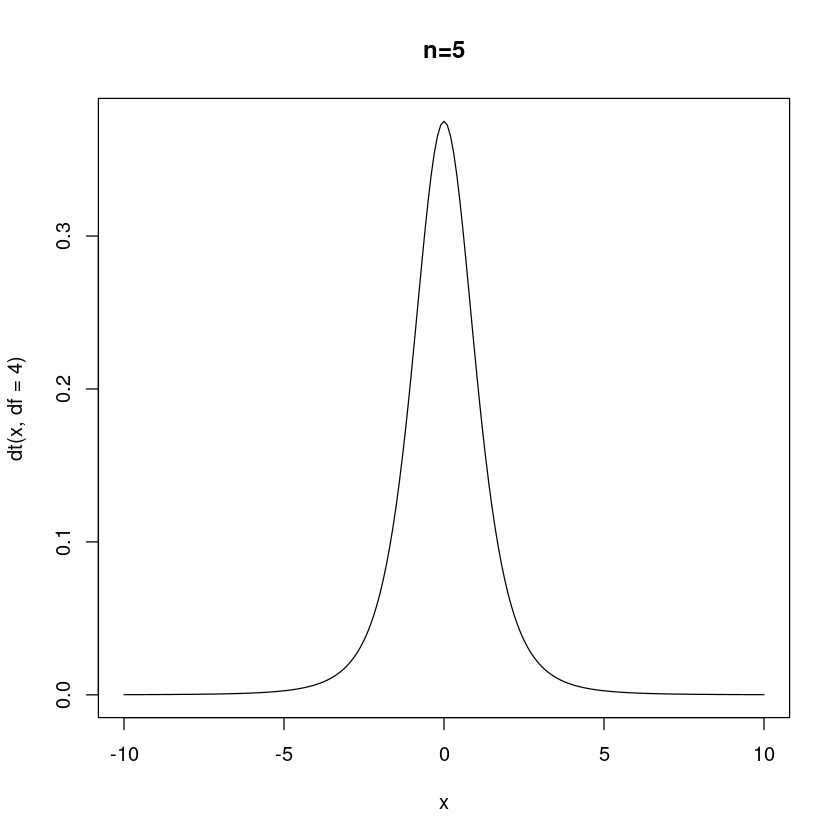

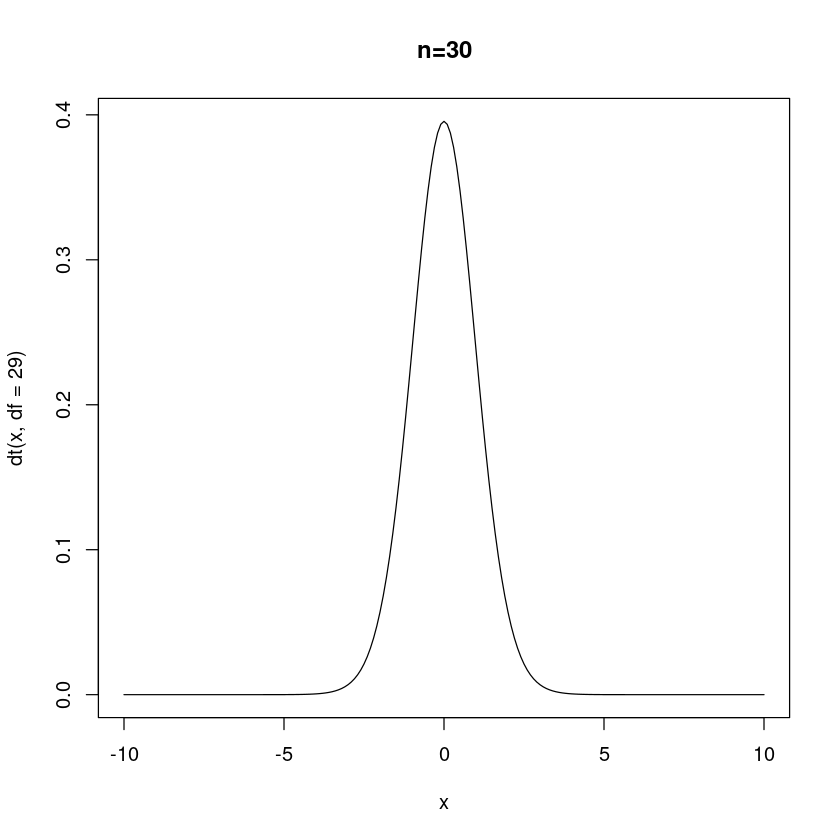

In [21]:
x <- -100:100/10
plot(x, dt(x, df=4), type="l", main="n=5")
plot(x, dt(x, df=29), type="l", main="n=30")

### Schemat postępowania
#### 1. Sprawdzamy czy zmienna X ma rozkład normalny?
Jeśli nie to zwiększamy próbe
#### 2. Określamy hipoteze
#### 3. Sprawdzanie testu
$$T = \frac{\bar{X} - \mu}{S_{\bar{X}}}$$
**Gdzie $S_{\bar{X}} = \frac{S}{\sqrt{n}}$ a S estymujemy z próby**
#### 4. Wybór poziomu istotności
#### 5. Podjęcie decyzji

In [70]:
# Funkcja pomocnicza do rysowania rozkładu t-Studenta
plot_norm_t  <- function(t, t_crit, n) {
    x_max  <- max(3, abs(t))
    x  <- seq(-x_max, x_max, 0.1)
    y  <- dt(x, n-1)
    plot(x, y, type="l")
    abline(v = t, col="blue", lty=2)
    for (tc in t_crit) {
        if (tc > 0) {
            x_c  <- c(tc, tc, x[x > tc], max(x))
            y_c  <- c(0, dt(tc, n-1), y[x > tc], 0) 
        } else {
            x_c  <- c(min(x), x[x < tc], tc, tc)
            y_c  <- c(0, y[x < tc], dt(tc, n-1), 0)             
        }
        polygon(x_c, y_c, border=NA, col="firebrick1")
    }
}

### Przykład
Sprzedawana ilość napoju w pewnym barze to 500 ml. Sprawdzamy czy barman nalewa 500 ml napoju. <br>
Hipoteza zerowa: $H_0: \mu = 500$ <br>
Hipoteza alternatywna: $H_1: \mu \neq 500$ <br>
Przyjmujemy poziom istotności $\alpha = 0.05$ <br>
Zmienna X ma rozkład normalny <br>
Próba n = 20 $\bar{X}=493$ $S=10$ <br>

[1] "Wartość testowa: -3.13049516849971"
[1] "Obszar akceptacji: -2.09302405440831 , 2.09302405440831"


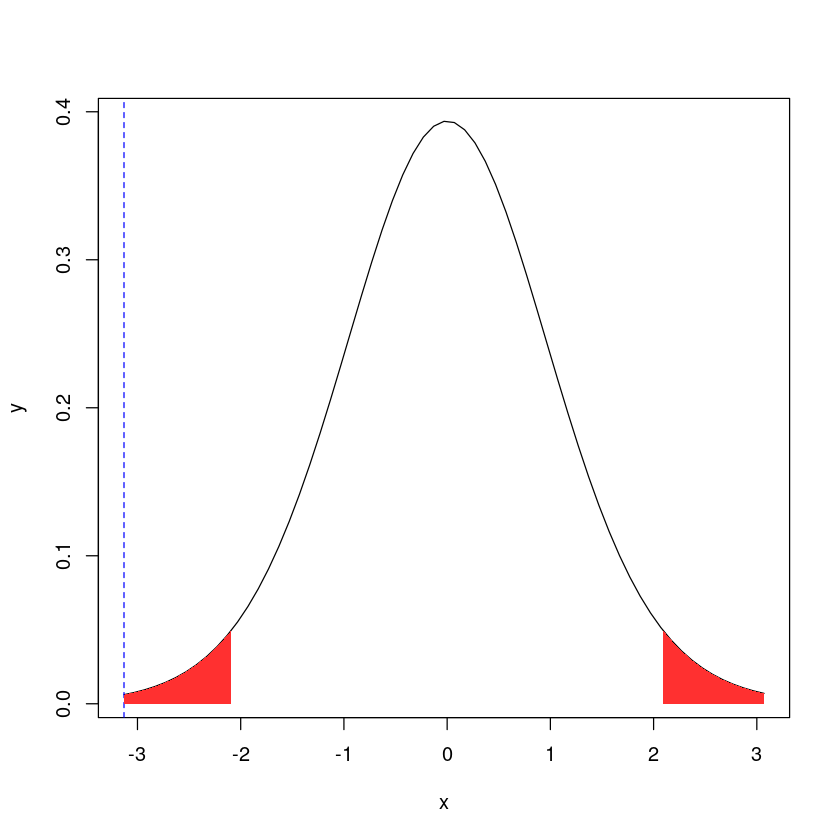

In [78]:
alpha = 0.05
n = 20
x = 500
x_hat = 493
s = 10
s_x = s / sqrt(n)
t = (x_hat - x) / s_x
print(paste("Wartość testowa:", t))
print(paste("Obszar akceptacji:", qt((alpha/2), n-1), ",", qt(1-(alpha/2), n-1)))
plot_norm_t(t, c(qt((alpha/2), n-1), qt(1-(alpha/2), n-1)), n)

Dla podanego przykłądu odrzucamy hipoteze zerowa
#### Przykład nr 2
Rozważymy podobny problem ale założymy test jednostronny lewostronny oraz średnią 496.5

[1] "Wartość testowa: -1.56524758424985"
[1] "Obszar akceptacji: -1.72913281152137"


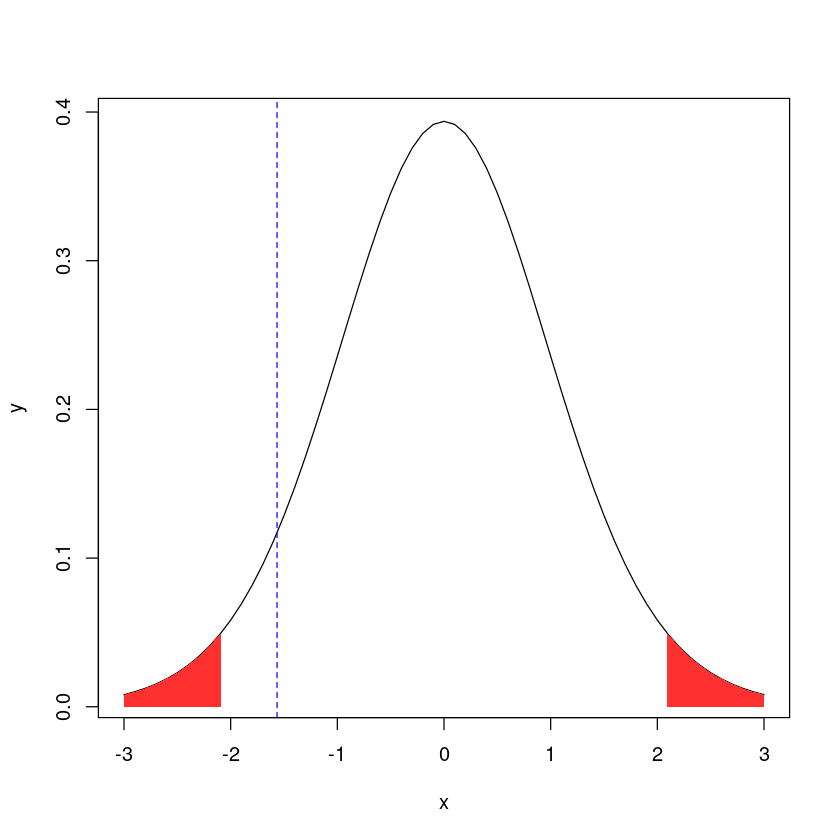

In [79]:
alpha = 0.05
n = 20
x = 500
x_hat = 496.5
s = 10
s_x = s / sqrt(n)
t = (x_hat - x) / s_x
print(paste("Wartość testowa:", t))
print(paste("Obszar akceptacji:", qt(alpha, n-1)))
plot_norm_t(t, c(qt((alpha/2), n-1), qt(1-(alpha/2), n-1)), n)

W tym przypadku nie ma powodów do odrzucenia H0